# **Loading Libraries**

In [ ]:
## Loading Initial Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix

# **Load data & Data pre-processing**

In [ ]:
## Load Data & Data pre-processing
df = pd.read_csv('tumor.csv')
df = df.drop('Sample code number', axis=1) # Delete Column 'Sample code number' 
print(df.head())
print(df.shape)
print(df.isnull().sum()) #Che

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


# **Data Visualization**

2    444
4    239
Name: Class, dtype: int64

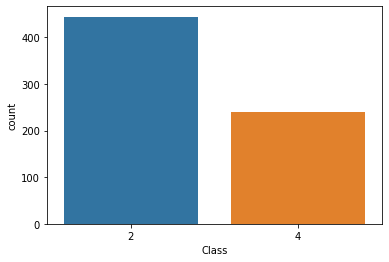

In [ ]:
## Data visualization
sns.countplot(data = df , x = 'Class')
df['Class'].value_counts()

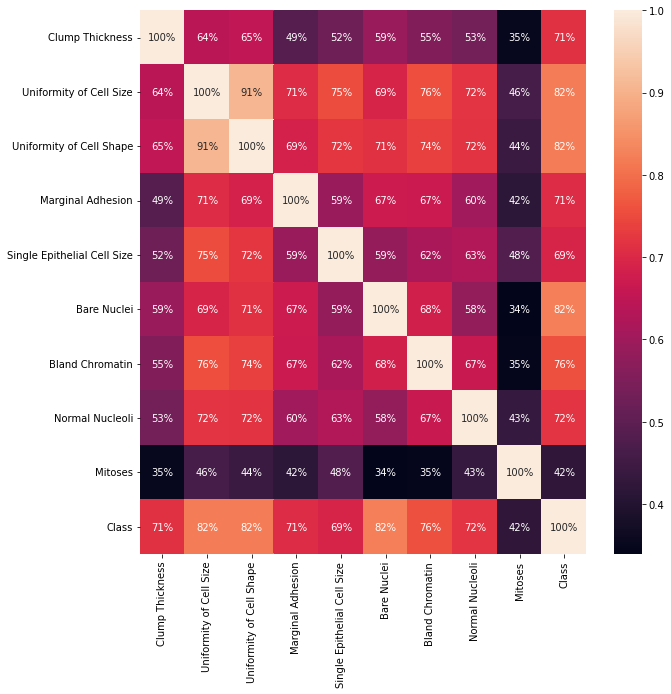

In [ ]:
# Correlations
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

#  **Gaussian Naive Bayes Model along with K-fold**

In [ ]:
# create an instance of the GaussianNB model
classifier = GaussianNB()

# prepare the data 
X = df.drop(['Class'] , axis = 1).values # Use .values Data Frame --> Numpy
y = df['Class'].values 

# split the data into k-folds
kfold = KFold(n_splits = 5, shuffle = True , random_state = 42)

# cross-validation score
scores = cross_val_score(classifier, X, y, cv=kfold)
print(scores) 

[0.95620438 0.99270073 0.94160584 0.95588235 0.95588235]


# **Confusion Matrix**

Confusion Matrix:
[[76  3]
 [ 3 55]]


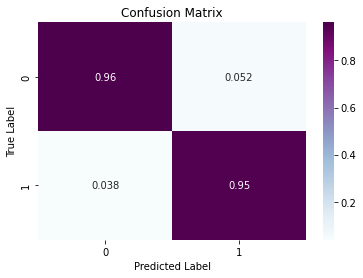

Confusion Matrix:
[[94  1]
 [ 0 42]]


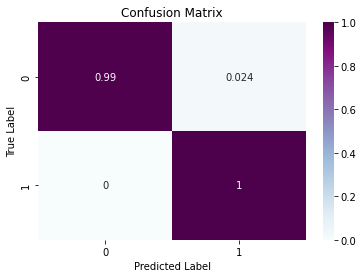

Confusion Matrix:
[[84  7]
 [ 1 45]]


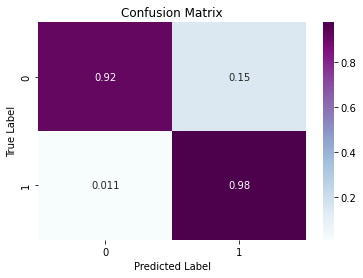

Confusion Matrix:
[[88  6]
 [ 0 42]]


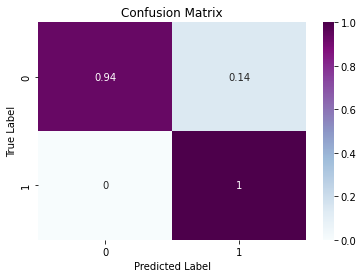

Confusion Matrix:
[[81  4]
 [ 2 49]]


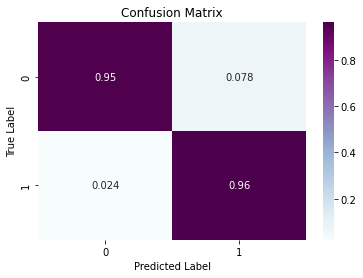

In [ ]:
# Confusion Matrix 
for train_index, test_index in kfold.split(X): # x,y ต้องเป็น numpy
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    # Visualize confusion matrix
    cmn = cm.astype('float') / cm.sum(axis=1)
    sns.heatmap(cmn, annot=True, cmap="BuPu")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()